In [1]:
import os

import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models, Input
from tensorflow.keras import layers, Input
from tensorflow.keras.layers import Input, Lambda
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Lambda
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
AES_Sbox = np.array([
    0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76,
    0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0,
    0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
    0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75,
    0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84,
    0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
    0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8,
    0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2,
    0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73,
    0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB,
    0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79,
    0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08,
    0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A,
    0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E,
    0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF,
    0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16
])


In [2]:
def plot_training_history(history):
    # Extract all metric names from history
    metrics = list(history.history.keys())
    
    # Separate metrics into loss and accuracy categories
    loss_metrics = [m for m in metrics if 'loss' in m and not m.startswith('val_')]
    accuracy_metrics = [m for m in metrics if ('accuracy' in m or 'acc' in m) and not m.startswith('val_')]
    
    # Plot each loss metric in a separate figure
    for metric in loss_metrics:
        plt.figure(figsize=(3, 2))
        plt.plot(history.history[metric], label=metric)
        
        # Plot corresponding validation metric if exists
        val_metric = 'val_' + metric
        if val_metric in history.history:
            plt.plot(history.history[val_metric], label=val_metric)
        
        plt.title(f'{metric.capitalize().replace("_", " ")} Over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    
    # Plot each accuracy metric in a separate figure
    for metric in accuracy_metrics:
        plt.figure(figsize=(3, 2))
        plt.plot(history.history[metric], label=metric)
        
        # Plot corresponding validation metric if exists
        val_metric = 'val_' + metric
        if val_metric in history.history:
            plt.plot(history.history[val_metric], label=val_metric)
        
        plt.title(f'{metric.capitalize().replace("_", " ")} Over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

In [3]:
def build_mlp(input_shape):
    model = Sequential([
        Dense(32, activation='relu'),
        Dense(64, activation='relu'),
        Dense(128, activation='relu'),
        Dense(256, activation='relu'),
        Dropout(0.2),
        Dense(256, activation='softmax') 
    ])
    model.build(input_shape=(None, input_shape))
    return model

In [4]:
def load_traces(T_path,C_path,K_path): #LCJ:重点函数   

    traces = np.load(T_path)
    ct_name = np.load(C_path)       
    key_name = np.load(K_path)  
    key = key_name.astype(int)
    ct = ct_name.astype(int)
    labels=np.bitwise_xor(ct[:,0],key[:,0])
    indices = np.arange(labels.shape[0])  
    np.random.shuffle(indices)    
    labels = labels[indices]
    traces = traces[indices]
    
    return traces,labels

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 32)                672       
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dense_7 (Dense)             (None, 128)               8320      
                                                                 
 dense_8 (Dense)             (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 256)               65792     
                                                                 
Total params: 109,920
Trainable params: 109,920
Non-tr

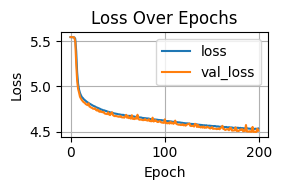

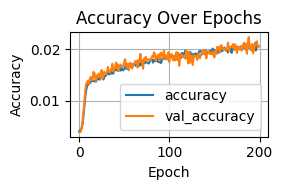

In [15]:
if __name__ == "__main__":
# -----------------------------
# Build & Compile
# -----------------------------

    learning_rate = 0.0001
    epochs=200
    T_path="Data_SE\\Train\\D_1-5\\100_traces_maxmin.npy"
    C_path="Data_SE\\Train\\D_1-5\\100_ct.npy"
    K_path="Data_SE\\Train\\D_1-5\\100_10th_roundkey.npy"

    x_train, y_train = load_traces(T_path,C_path,K_path)
    x_train = x_train[:, 200:220] #LCJ:数据切片，重要

    
    model = build_mlp(x_train.shape[1])
    model.compile(optimizer=Adam(learning_rate), loss=CategoricalCrossentropy(), metrics='accuracy')
    print(model.summary())
    history = model.fit(x=x_train, y=to_categorical(y_train, num_classes=256), validation_split=0.2, batch_size=256, epochs=epochs)
    plot_training_history(history)

    model.save('Model\\model.h5')

In [10]:
np.save('traces',x_train)
np.save('labels',y_train)

In [12]:
x_train.shape

(200000, 20)

In [14]:
y_train.shape

(200000,)